In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import sklearn as sk
import statsmodels as sm

from datetime import datetime as dt
from datetime import datetime as date

import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
-Convert the date format to datetime.
-This target variable is weekly sales. 
-There are no missing data.
-The shape is (6435,8.)

In [14]:
# Date formatting : 
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [15]:
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [16]:
data['DateType'] = [dt.strptime(date, '%Y-%m-%d').date() for date in data['Date'].astype(str).values.tolist()]

In [ ]:
Holidays:

In [17]:
data['Superbowl'] = np.where((data['DateType'] == dt(2010, 2, 12).date()) | (data['DateType'] == dt(2011, 2, 11).date())| 
                             (data['DateType'] == dt(2012, 2, 10).date()) | (data['DateType'] == dt(2013, 2, 8).date()),1, 0)

data['Labor_Day'] = np.where((data['DateType'] == dt(2010, 9, 10).date()) | (data['DateType'] == dt(2011, 9, 9).date()) | 
                             (data['DateType'] == dt(2012, 9,  7).date()) | (data['DateType'] == dt(2013, 9, 6).date()),1, 0)

data['Christmas'] = np.where((data['DateType'] == dt(2010, 12, 31).date()) | (data['DateType'] == dt(2011, 12, 30).date())| 
                             (data['DateType'] == dt(2012, 12, 28).date()) | (data['DateType'] == dt(2013, 12, 27).date()),1, 0)

data['Thanksgiving'] = np.where((data['DateType'] == dt(2010, 11, 26).date())| (data['DateType'] == dt(2011, 11, 25).date())|
                                (data['DateType'] == dt(2012, 11, 23).date())|(data['DateType'] == dt(2013, 11, 29).date()),1,0)

In [18]:
print(data.Superbowl.value_counts())
print(data.Labor_Day.value_counts())
print(data.Thanksgiving.value_counts())
print(data.Christmas.value_counts())

0    6435
Name: Superbowl, dtype: int64
0    6390
1      45
Name: Labor_Day, dtype: int64
0    6345
1      90
Name: Thanksgiving, dtype: int64
0    6345
1      90
Name: Christmas, dtype: int64


In [ ]:
1.Which store has maximum sales

In [19]:
store_sales = data.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending = False)
round(store_sales, 1).head()

Store
20    301397792.5
4     299543953.4
14    288999911.3
13    286517703.8
2     275382441.0
Name: Weekly_Sales, dtype: float64

In [ ]:
The store 20 has maximum sales

In [ ]:
2.Which store has maximum standard deviation i.e., the sales vary a lot. Also, 
find out the coefficient of mean to standard deviation

In [20]:
store_std = data.groupby(['Store'])['Weekly_Sales'].std().sort_values(ascending = False)
round(store_std, 2).head()

Store
14    317569.95
10    302262.06
20    275900.56
4     266201.44
13    265507.00
Name: Weekly_Sales, dtype: float64

In [21]:
store_mean = data.groupby(['Store'])['Weekly_Sales'].mean().sort_values(ascending = False)

coeff_variance = round(store_std / store_mean, 2)

coeff_variance.sort_values(ascending = False).head()

Store
35    0.23
7     0.20
15    0.19
23    0.18
29    0.18
Name: Weekly_Sales, dtype: float64

In [ ]:
-As previously mentioned, coeff_variance provides the coefficient of variance with 
 respect to specific dataset stores.
-Store 14 has the maximum standard deviation.

In [ ]:
3. Which store/s has good quarterly growth rate in Q3’2012

In [22]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter

data.drop(columns = 'DateType', inplace = True)

data.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Superbowl,Labor_Day,Christmas,Thanksgiving,Year,Month,Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,0,2010,12,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,2010,2,1


In [23]:
q3 = data[(data['Quarter'] == 3) & (data['Year'] == 2012)].groupby('Store')['Weekly_Sales'].sum().sort_values(ascending = False)
q3.head(3)

Store
4     25652119.35
20    24665938.11
13    24319994.35
Name: Weekly_Sales, dtype: float64

In [ ]:
-In comparison to other retailers, Store 4 had a strong quarterly growth rate in Q3 
 of 2012, with a maximum profit of 25652119.35.

In [ ]:
Growth Rate :
-The formula for calculating growth rate is the ratio of current value to past value 
 divided by past value as a whole and multiplied by 100. (since it is in percentage)
-((Present value — Past value )/Past value )*100

In [24]:
Q3_date_from = pd.Timestamp(date(2012, 7, 1))
Q3_date_to = pd.Timestamp(date(2012, 9, 30))
Q2_date_from = pd.Timestamp(date(2012, 4, 1))
Q2_date_to = pd.Timestamp(date(2012, 6, 30))

#Collecting the data of Q3 and Q2 from original dataset.
Q2data = data[(data['Date'] > Q2_date_from) & (data['Date'] < Q2_date_to)]
Q3data = data[(data['Date'] > Q3_date_from) & (data['Date'] < Q3_date_to)]

#finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace = True)

#finding the sum weekly sales of each store in Q2
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns = {'Weekly_Sales': 'Q3_Weekly_Sales'},inplace = True)

#mergeing Q2 and Q3 data on Store as a common column
Q3_Growth= Q2.merge(Q3,how =  'inner',on = 'Store')

#Calculating Growth rate of each Store and collecting it into a dataframe  
Q3_Growth['Growth_Rate'] = (Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales']) / Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate'] = round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending = False).head(3)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03
6,7,7613593.92,7322393.92,-0.04
34,35,10753570.97,10252122.68,-0.05


In [25]:
Q3_Growth.sort_values('Growth_Rate',ascending = False).tail(3)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
35,36,4090378.90,3578123.58,-0.13
44,45,10278900.05,8851242.32,-0.14
13,14,24427769.06,20140430.40,-0.18


In [ ]:
-From above information we can say that Q3 growth rate is in loss.
-Store 16 has the least loss of 3% compared with other stores.
-Store 14 has the highest loss total of 18%

In [ ]:
4. Some holidays have a negative impact on sales. Find out holidays which have higher 
sales than the mean sales in non-holiday season for all stores together

In [26]:
round(data.groupby(['Holiday_Flag'])['Weekly_Sales'].sum(),1)

Holiday_Flag
0    6.231919e+09
1    5.052996e+08
Name: Weekly_Sales, dtype: float64

In [27]:
print('0 :', 6.231919e+09)
print('1 :', 5.052996e+08)

0 : 6231919000.0
1 : 505299600.0


In [28]:
Spr_sales = data.groupby(['Superbowl'])['Weekly_Sales'].mean()

Ld_sales = data.groupby(['Labor_Day'])['Weekly_Sales'].mean()

Thanksg_sales = data.groupby(['Thanksgiving'])['Weekly_Sales'].mean()

Christmas_sales = data.groupby(['Christmas'])['Weekly_Sales'].mean()

Non_Holi_Sales = data[(data['Holiday_Flag'] == 0)].groupby('Holiday_Flag')['Weekly_Sales'].mean()


print(round(Spr_sales, 2))
print(round(Ld_sales, 2))
print(round(Thanksg_sales, 2))
print(round(Christmas_sales, 2))
print(round(Non_Holi_Sales, 2))

Superbowl
0    1046964.88
Name: Weekly_Sales, dtype: float64
Labor_Day
0    1047019.68
1    1039182.83
Name: Weekly_Sales, dtype: float64
Thanksgiving
0    1040946.32
1    1471273.43
Name: Weekly_Sales, dtype: float64
Christmas
0    1048186.60
1     960833.11
Name: Weekly_Sales, dtype: float64
Holiday_Flag
0    1041256.38
Name: Weekly_Sales, dtype: float64


In [ ]:
Visualizing :
1.Sales in Super Bowl holiday

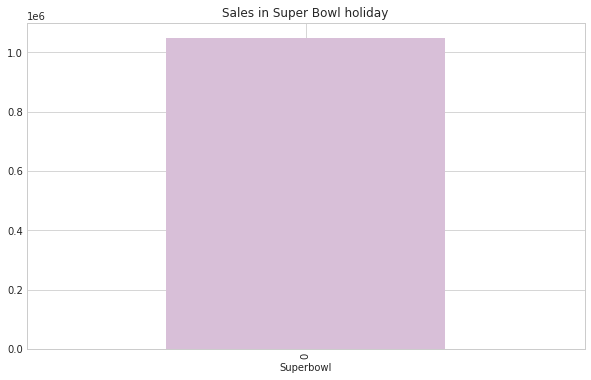

In [29]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
Spr_sales.plot(kind = 'bar', legend = False, title = 'Sales in Super Bowl holiday', color = 'thistle')
plt.show()

In [ ]:
2.Sales in Labor Day holiday

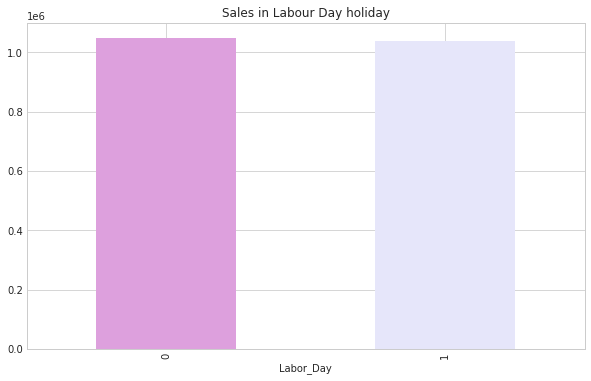

In [30]:
plt.figure(figsize = (10, 6))
Ld_sales.plot(kind = 'bar', legend = False, title = 'Sales in Labour Day holiday', color = ['plum','lavender'])
plt.show()

In [ ]:
3.Sales in Thanksgiving holiday.

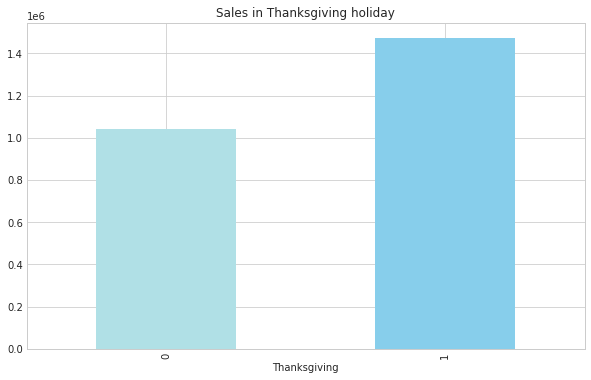

In [31]:
plt.figure(figsize = (10, 6))
Thanksg_sales.plot(kind = 'bar', legend = False, title = 'Sales in Thanksgiving holiday', color = ['powderblue','skyblue'])
plt.show()

In [ ]:
4.Sales in Christmas holiday

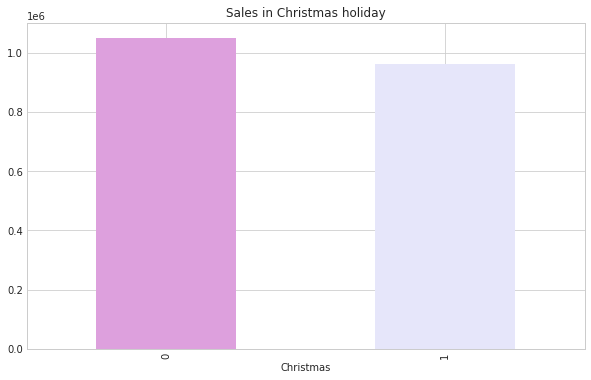

In [32]:
plt.figure(figsize = (10, 6))
Christmas_sales.plot(kind = 'bar', legend = False, title = 'Sales in Christmas holiday', color = ['plum','lavender'])
plt.show()

In [ ]:
5.Non Holiday Sales.

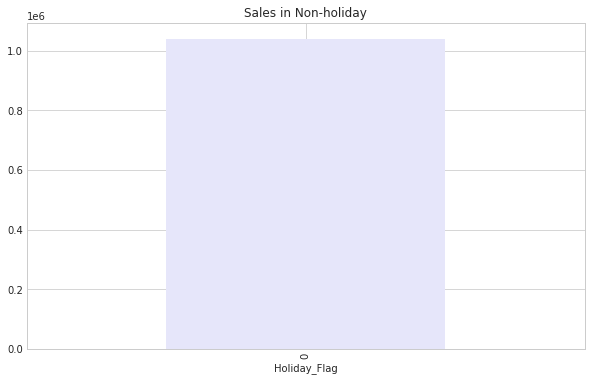

In [33]:
plt.figure(figsize = (10, 6))
Non_Holi_Sales.plot(kind = 'bar', legend = False, title = 'Sales in Non-holiday', color = 'lavender')
plt.show()

In [ ]:
5.Provide a monthly and semester view of sales in units and give insights.

I.Monthly sales view

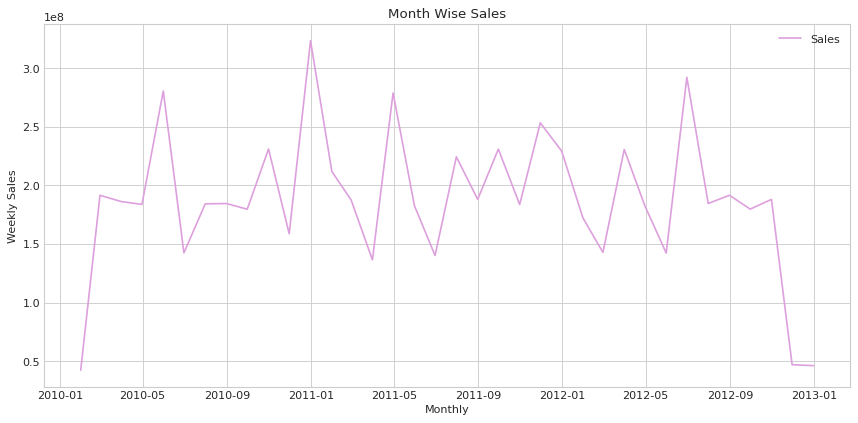

In [34]:
monthly = data.groupby(pd.Grouper(key = 'Date', freq = '1M')).sum()
monthly = monthly.reset_index()
fig, ax = plt.subplots(figsize=(13,6), dpi = 80)
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y, color = 'plum')
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly Sales')
plt.legend(['Sales'])
plt.show()

In [ ]:
II.Semester wise sales view

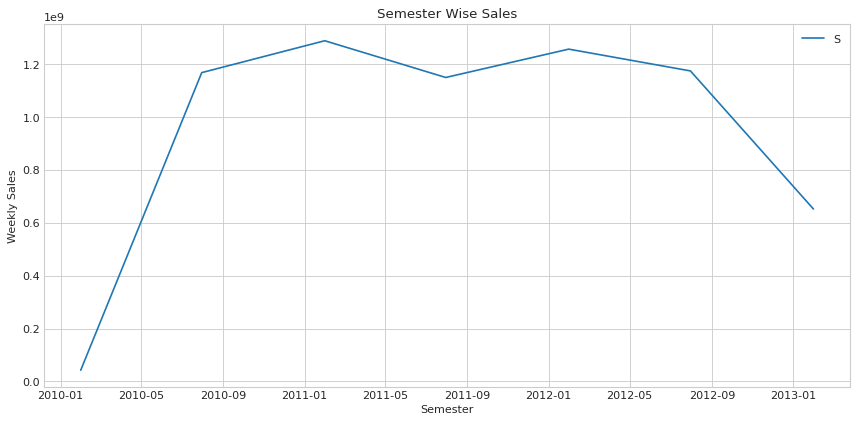

In [35]:
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(13,6), dpi = 80)
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly Sales')
plt.legend('Sales')
plt.show()

In [ ]:
-We can infer that there's a big spike in sales from February-2010 to February-2011. 
 Exactly for one year we can say.
-Then spike goes bit down in February-2011 after that again there are few ups-downs in 
 further.
-From August-2012 sales goes down. - We can acknowledge that there is loss in sales.

In [ ]:
For Store 1 – Build prediction models to forecast demand

In [36]:
data.drop(columns = ['Superbowl', 'Labor_Day', 'Christmas', 'Thanksgiving'], inplace = True)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [38]:
data['Store']

0        1
1        1
2        1
3        1
4        1
        ..
6430    45
6431    45
6432    45
6433    45
6434    45
Name: Store, Length: 6435, dtype: int64

In [39]:
data['Store'] = data['Store'].astype(str)
data['Store'] = 'Store ' + data['Store'].astype(str)

data.Store

0        Store 1
1        Store 1
2        Store 1
3        Store 1
4        Store 1
          ...   
6430    Store 45
6431    Store 45
6432    Store 45
6433    Store 45
6434    Store 45
Name: Store, Length: 6435, dtype: object

In [40]:
labelEncod = LabelEncoder()
store_1 = data[data['Store'] == 'Store 1']
store_1 = store_1.copy()

store_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Quarter
0,Store 1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,Store 1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,4
2,Store 1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,1
3,Store 1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,1
4,Store 1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,2


In [41]:
store_1['Days'] = labelEncod.fit_transform(store_1['Date'])
store_1.drop(['Store','Date','Holiday_Flag','Year','Month','Quarter'], axis=1 , inplace = True)

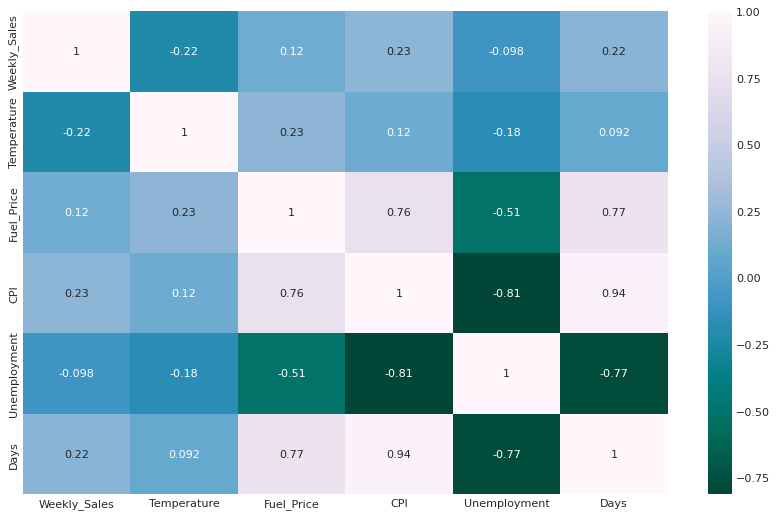

In [42]:
import seaborn as sns
corr = store_1.corr()
plt.figure(figsize = (13,8), dpi = 80)
corrmap = sns.heatmap(store_1.corr(), cmap = 'PuBuGn_r', annot = True)
corrmap
plt.show()

In [ ]:
Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [ ]:
Model Building : Linear Regression

In [ ]:
-As we can see Unemployment is profoundly related with days and is inconsequential as 
 it relationship with Week after week Deals is very low.
-Additionally temperature and Unemployment are adversely influencing the deals .
-Anyway Fuel Cost and CPI are positively affecting the Deals.

In [43]:
from sklearn.model_selection import train_test_split

X = store_1[['Days', 'Fuel_Price', 'CPI', 'Unemployment']]
y = store_1['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)


print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('-'*40)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (114, 4)
Shape of y_train : (114,)
----------------------------------------
Shape of X_test : (29, 4)
Shape of y_test : (29,)


In [44]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = linear_reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 104768.40557779375
Mean Squared Error: 21350591361.51655
Root Mean Squared Error: 146118.4155454628


In [46]:
print('Coefficients: \n',linear_reg.coef_)

Coefficients: 
 [   712.03276817 -97206.78823378  19978.81310442 125101.27927163]


In [48]:
print('Variance score: %.2f' % linear_reg.score(X_test, y_test))

Variance score: -0.16


In [49]:
RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr = RandomForestRegressor(n_estimators = 400, max_depth = 15)
rfr.fit(X_train, y_train)
Y_pred = rfr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('-'*40)
print('Variance score: %.2f' % rfr.score(X_test, y_test))

Mean Absolute Error: 104768.40557779375
Mean Squared Error: 21350591361.51655
Root Mean Squared Error: 146118.4155454628
----------------------------------------
Variance score: 0.16


In [52]:
Actual_vs_Pred = pd.DataFrame({"Actual Sales" : y_test, "Predicted Sales": y_pred})
Actual_vs_Pred.head()

,Actual Sales,Predicted Sales
136,1517428.87,1.597046e+06
128,1497954.76,1.618555e+06
114,1621031.70,1.573164e+06
45,1891034.93,1.509153e+06
31,1507460.69,1.526287e+06


In [ ]:
Predicted Demand for Store 1

In [53]:
# Errors in % w.r.t the particular store sales : predicted sales and actual sales.
Errors = pd.DataFrame({'errors':round(((abs(y_pred - y_test))/y_test)*100,2)})
Errors.head()

,errors
136,5.25
128,8.05
114,2.95
45,20.19
31,1.25
